### Using Local Information for Prediction

One of the simplest approaches to learning uses the surrounding known classified points to guess at the classification of unknown points.  In this notebook we will outline an algorithm that uses this idea, called the K-Nearest Neighbor Algorithm (KNN).  

Let's look at some example data to illustrate how this works.  Below we generated a fake data set.

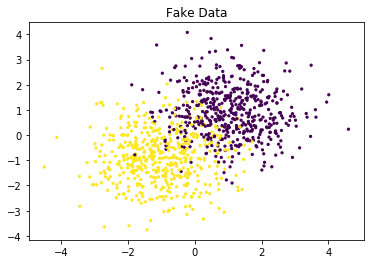

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# generate two blobs and draw them
centers = [[1, 1], [-1, -1]]

X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=1)
plt.title("Fake Data")
plt.scatter(X[:,0], X[:,1], c = y, s=5)
plt.show()

Now suppose we wanted to find the distance to a new data point.  if the point is in the lower left or the upper right of the image, we can guess with some certainty that the class of the new point is the same as the class of the surrounding points.  

What if the point we add is in the middle of the image?, say close to (0,0) for example?  The KNN approach is to look at the $k$ nearest points and then to use the plurality of points with the same class to classify outr new point.  

For example, suppose $k=1$ and our new point is $p=(p_1, p_2)$.  Then we look for the closest value in the training set to the point $p$.  Lets say the closest point is $\vec{x_j}$.  The KNN with $k=1$ simply looks at the class $y_j$ of the closest point and assigns that class to the point $p$.  

$k=1$ is usually too granular, producing a lot of tiny islands of each class.  This is a class sign of _overfitting_, which we will discuss in detail in a later lecture.  Overfitting means that the Classifier has a low error on the training data ($E_{in}$) but a high error rate on test data (approximating $E_{out}$).

Let's look at the decision boundary for the KNN algorithm with $k=1$ to see what it looks like.

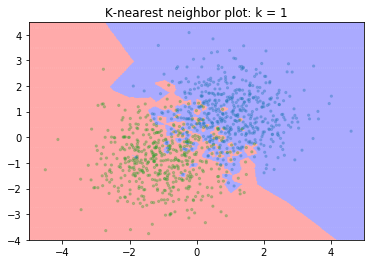

In [36]:
# a procedure for generating a meshgrid plot of the decision boundary of our classifiers.
def decisionBoundary(model, ax):
#    x_min, x_max = -0.1, 1.1
#    y_min, y_max = -0.1, 1.1
    x_min, x_max = -5, 5
    y_min, y_max = -4, 4.5
    h = .02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5)

    return ax
   
# now we will create a procedure for the scatterplot as well as it is boilerplate code
def plot_points(ax, x_train, y_train, title = None):
    if title is not None:
        ax.set_title(title)
    # map color to target values (y_train)
    color = np.array(['C0', 'C2', 'C1'])[y_train]
    ax.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=5, alpha=0.3)
    return ax

from sklearn.neighbors import KNeighborsClassifier

f, ax = plt.subplots()

k = 1
model1 = KNeighborsClassifier(k, 'uniform').fit(X, y)

ax = decisionBoundary(model1, ax)
ax = plot_points(ax, X, y, title="K-nearest neighbor plot: k = {}".format(k))
plt.show()

The decision boundary is illustrated above by the border between the different colored regions.  For $k=1$, you can see how the boundary is lumpy and has small islands that are very good for $E_{in}$ but will probably be an issue for generalization. Usually we want to see a smoother decision boundary.  

KNN can produce a smoother boundary by increasing the value of $k$.  Increasing k means we have to decide somehow which class to choose among the $\vec{x}$ values being compared.  Here's how it works.

First sort ascending all the points in $\vec{x}$ by their distance for $p$.  Pick the top $k$ points $\vec{x}$.  These are the $k$ points closest to $p$.  Now look at the $y$ values associated with those points.  Pick the most common $y$ value in the $k$ points and assign that $y$ value to $p$.

Let's calculate and plot some examples below to see how the decision boundary changes as we increase $k$.

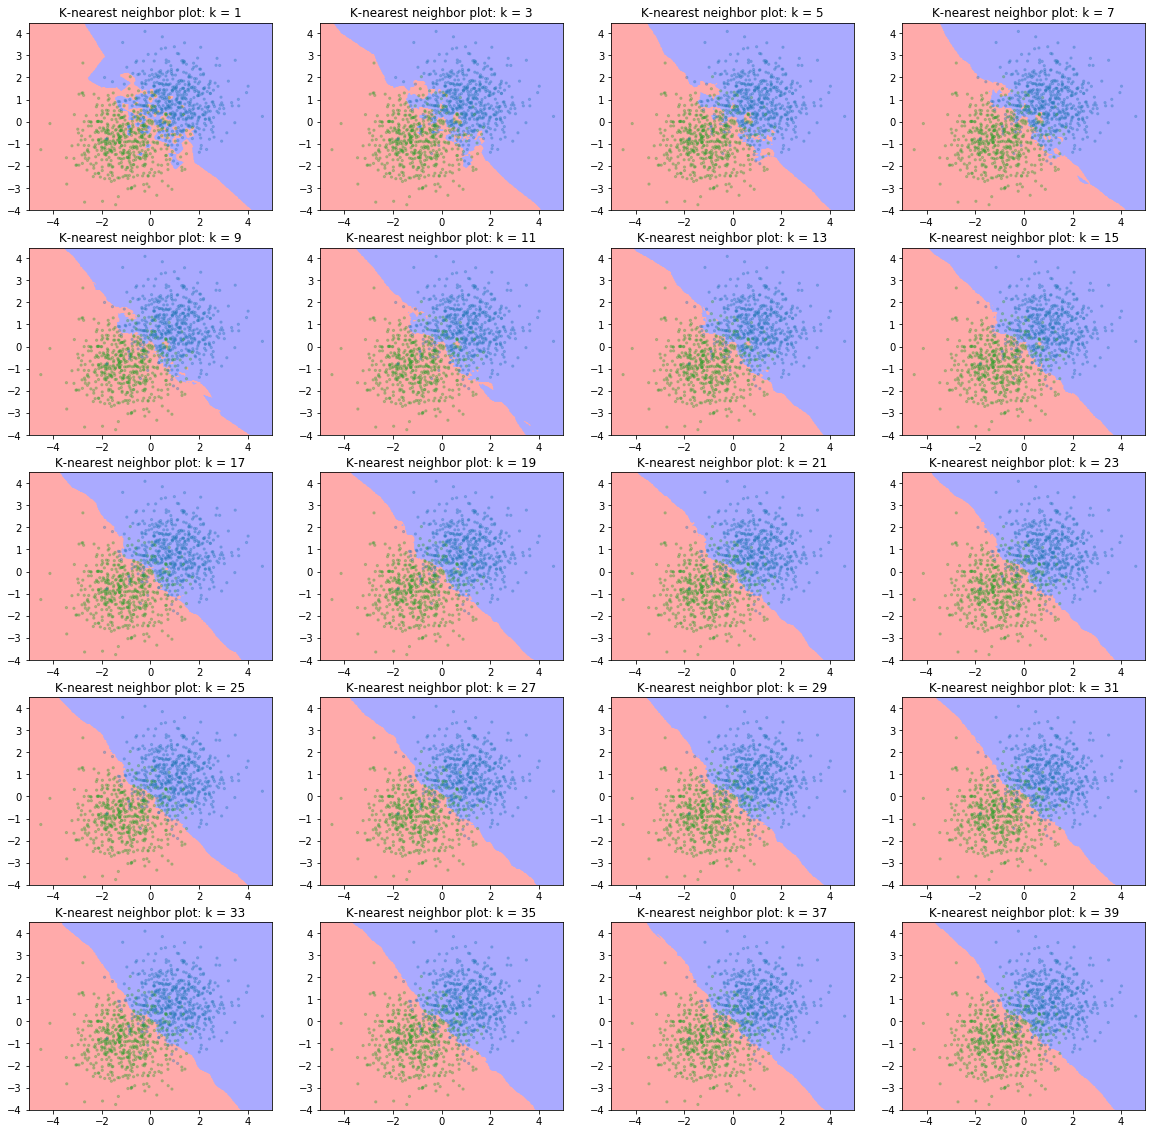

In [37]:

f, axs = plt.subplots(5,4, figsize = (20,20))

# treat axs as a 1-D array in order to iterate
axs = axs.flatten()

for i,axis in enumerate(axs):
  k = 2*i+1       # make k always be odd for tie-breakers
  model = KNeighborsClassifier(k, 'uniform').fit(X, y)

  axis = decisionBoundary(model, axis)
  axis = plot_points(axis, X, y, title="K-nearest neighbor plot: k = {}".format(k))

plt.show()

As $k$ increases, the decision boundary becomes more regular.  